In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline
from PIL import Image 


In [3]:
cd /Users/austinmcdonald/Desktop/CCD

/Users/austinmcdonald/Desktop/CCD


In [4]:
os.listdir()

['spot3.tif']

In [5]:
im = Image.open('spot3.tif')
im.show()

In [6]:
Imdat = np.array(im)


In [7]:
Imdat

array([[ 9,  9,  9, ...,  2,  1,  1],
       [ 9, 11, 10, ...,  2,  2,  2],
       [ 8, 11, 10, ...,  2,  1,  2],
       ..., 
       [ 3,  3,  4, ...,  1,  0,  0],
       [ 3,  4,  3, ...,  1,  1,  1],
       [ 3,  4,  4, ...,  1,  0,  0]], dtype=uint8)

In [8]:
Imdat.shape

(512, 512)

In [10]:
maxx=[]
for x in range(0,2048):
    maxx.append(max(Imdat[x]))
max(maxx)

65535

In [11]:
len(Imdat)

2048

In [25]:
scat = np.arange(0,2048)

In [44]:
x=np.arange(64).reshape((8,8))
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [35]:
Row = 1
Col = 1
Xindex = 4 
Yindex = 1
x[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]

array([[ 3,  4,  5],
       [11, 12, 13],
       [19, 20, 21]])

In [8]:
Row = 20
Col = 20
Xindex = 83 
Yindex = 119
Image = Imdat[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]

In [38]:
Image

array([[ 52,  52,  55, ..., 101, 102, 104],
       [ 55,  56,  56, ..., 104, 102, 106],
       [ 56,  58,  60, ..., 106, 108, 106],
       ..., 
       [ 73,  79,  77, ..., 142, 146, 150],
       [ 78,  79,  76, ..., 138, 149, 150],
       [ 76,  78,  79, ..., 141, 151, 153]], dtype=uint8)

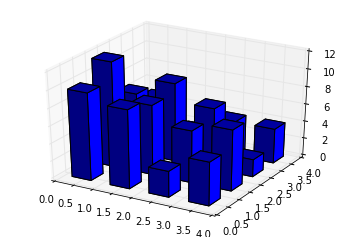

In [30]:
"""
==============================
Create 3D histogram of 2D data
==============================

Demo of a histogram for 2 dimensional data as a bar graph in 3D.
"""

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

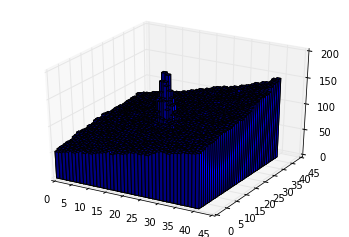

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
#
# Assuming you have "2D" dataset like the following that you need
# to plot.
#
data_2d = [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            [11, 12, 13, 14, 15, 16, 17, 18 , 19, 20],
            [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
            [21, 22, 23, 24, 25, 26, 27, 28, 29, 30] ]
#
# Convert it into an numpy array.
#
data_array = Image# = np.array(data_2d)
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
#
# Finally, display the plot.
#
plt.show()


In [34]:
data_array

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])

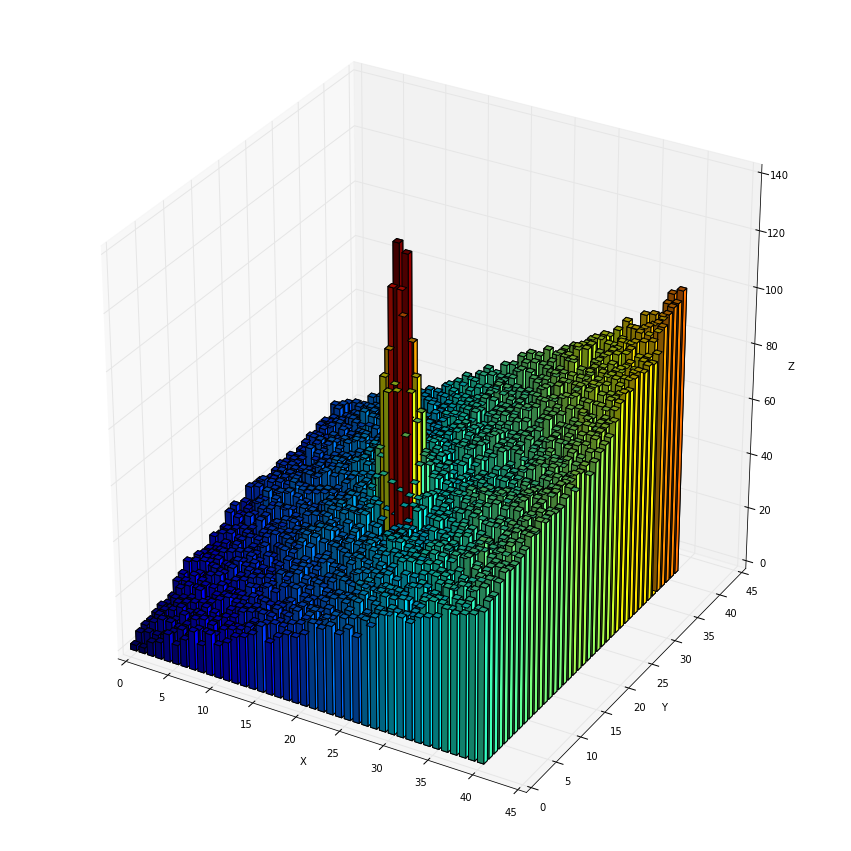

In [13]:
from mpl_toolkits.mplot3d import Axes3D

data = Image-50


ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()   
ypos = ypos.flatten()
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
ax.bar3d(xpos,ypos,zpos, .7,.7,data.flatten(), color=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.savefig('/Users/austinmcdonald/Desktop/CCD/CCD-image.pdf')

plt.show()

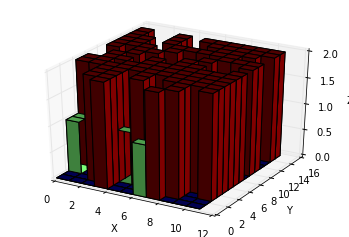

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = np.array([ [0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0],
         [0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0],
         [1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2],
         [1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2],
         [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
         [2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2],
         [0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2],
         [1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2],
         [0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0],
         [2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2],
         [2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2],
         [2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0],
         [2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0],
         [2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2],
         [2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2]])


ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()   
ypos = ypos.flatten()
zpos = np.zeros(xpos.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(data.max()))
ax.bar3d(xpos,ypos,zpos, 1,1,data.flatten(), color=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()